In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
# find files
log_files = []
for path, subdirs, files in os.walk('logs'):
    for name in files:
        if name.endswith('.log'):
            log_file = os.path.join(path, name)
            log_files.append(log_file)

In [3]:
len(log_files)

40

In [4]:
def inverse_triangular(m):
    return round(math.sqrt(2 * m + 0.25) - 0.5)

In [5]:
records = []

for log_file in log_files:
    num_total_jobs = int(log_file.split('/')[-1].split('=')[-1].split('.')[0])
    with open(log_file) as file:
        for line in file:
            if line.startswith('solver:PROFILE'):
                line = line.strip()
                tokens = line.split()
                job_combinations = int(tokens[1].split(':')[-1])
                num_jobs = inverse_triangular(job_combinations)
                solve_time = float(tokens[2].split(':')[-1]) * 1000
                setup_time = float(tokens[3].split(':')[-1]) * 1000
                total_time = solve_time + setup_time
                records.append((num_jobs, job_combinations, solve_time, setup_time, total_time))

data = pd.DataFrame(records, columns=['num_jobs', 'job_combinations', 'solve_time_millis', 'setup_time_millis', 'total_time_millis'])

In [6]:
data = data[data['job_combinations'] <= 1000]

In [7]:
data

,num_jobs,job_combinations,solve_time_millis,setup_time_millis,total_time_millis
0,12,78,2.290718,0.589829,2.880547
1,11,66,1.957270,0.498356,2.455626
2,8,36,1.021664,0.299998,1.321662
3,7,28,0.731504,0.233452,0.964956
4,6,21,0.564657,0.158590,0.723247
...,...,...,...,...,...
1152,5,15,0.292719,0.121945,0.414664
1153,4,10,0.199865,0.087484,0.287349
1154,3,6,0.113508,0.067358,0.180866
1155,2,3,0.066638,0.036525,0.103163


In [8]:
data.to_csv('data.csv')

Text(0, 0.5, 'Solver Time (ms)')

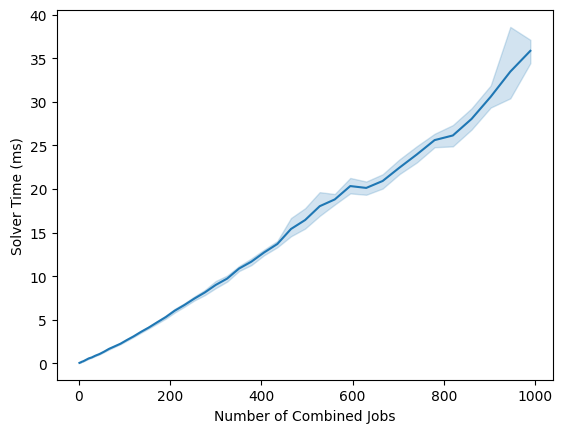

In [9]:
ax = sns.lineplot(data=data, x="job_combinations", y="total_time_millis")
ax.set_xlabel('Number of Combined Jobs')
ax.set_ylabel('Solver Time (ms)')

Text(0, 0.5, 'Solver Time (ms)')

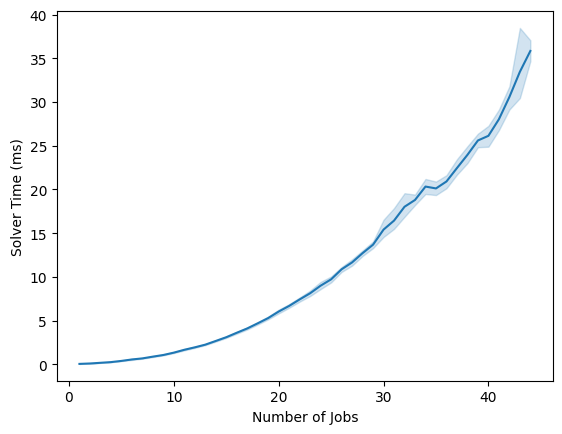

In [10]:
ax = sns.lineplot(data=data, x="num_jobs", y="total_time_millis")
ax.set_xlabel('Number of Jobs')
ax.set_ylabel('Solver Time (ms)')